Churn prediction
-------------------
Company churn occurs when companies cancel subscriptions or subscriptions expires without renewals.  
This notebook uses DecisionTree to predict Churn, and GridSearchCV to perform hyperparameter tuning.   

**Note:**
- only include license activation starting from 1/1/2019.
- both setup completed and not completed accounts are included.

In [0]:
import mlflow
import mlflow.sklearn
from datetime import datetime

mlflow.set_experiment("/Users/bxing@actsoft.com/Churn/DecisionTree/Churn_DecisionTree_SHAP")

# date that license deactivation will check against in determinding churn or no-churn,
# usually the date that data storage was created.
pred_datetime = datetime(2020, 7, 21)
mlflow.log_param("End date", pred_datetime)

# start datetime for license activation.
start_dateime = datetime(2019, 1, 1)
mlflow.log_param("Start date", start_dateime)

# include both registered and non registered users
registered_only = False
mlflow.log_param("Setup complete", registered_only)

2020/09/29 14:46:26 WARNING mlflow.tracking.context.git_context: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
 - be included in your $PATH
 - be set via $GIT_PYTHON_GIT_EXECUTABLE
 - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
 - quiet|q|silence|s|none|n|0: for no warning or exception
 - warn|w|warning|1: for a printed warning
 - error|e|raise|r|2: for a raised exception

Example:
 export GIT_PYTHON_REFRESH=quiet

In [0]:
%run /Users/bxing@actsoft.com/Churn/Churn_Dataframe

**Impose further limits on dataframe**

In [0]:
# df = df[df.Licenses < 100]
# df.shape

Out[15]: (2560, 24)

,CompanyId,InstanceId,CompanyName,Tier,IsSetupComplete,UserIntegrationType,AccountId,AccountName,City,RegionName,PostalCode,CountryCode,Culture,Activation,Expiration,Deactivation,Duration,Churn,Licenses,Incidents,Trips,Forms,Timekeeping,Orders
0,15236,50,LOUIS LATOUR,10,False,0,14186,LOUIS LATOUR,SAN RAFAEL,None,94903,US,en-US,2019-02-07,2019-08-26,2019-08-29 00:11:55.580,203,1,14,0,0,0,0,0
1,15263,50,MESSNER REEVES LLP,10,False,0,14205,MESSNER REEVES LLP,DENVER,None,80202,US,en-US,2019-02-08,2020-04-03,2020-04-03 00:02:12.830,420,1,23,0,0,0,0,0
2,15985,50,MORGAN,5,False,0,14870,MORGAN,LOUISVILLE,None,40215,US,en-US,2019-04-25,2019-07-28,2019-07-28 00:17:25.230,94,1,3,0,0,0,0,0
3,17359,50,HARTMAN FARMS,5,False,0,16668,HARTMAN FARMS,KOKOMO,None,46901,US,en-US,2019-09-09,2019-10-13,2019-10-13 00:13:16.100,34,1,4,0,0,0,0,0
4,17372,50,SGA PRODUCTION SERVICES,5,False,0,16677,SGA PRODUCTION SERVICES,NAPERVILLE,None,60563,US,en-US,2019-09-10,2020-02-06,2020-02-06 00:01:17.140,149,1,21,0,0,0,0,0


In [0]:
df.describe(include='all')

,CompanyId,InstanceId,CompanyName,Tier,IsSetupComplete,UserIntegrationType,AccountId,AccountName,City,RegionName,PostalCode,CountryCode,Culture,Activation,Expiration,Deactivation,Duration,Churn,Licenses,Incidents,Trips,Forms,Timekeeping,Orders
count,2560.000000,2560.0,2560,2560.000000,2560,2560.0,2560.000000,2560,2492,468,2484,2560,2560,2560,1754,1747,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000
unique,NaN,NaN,2515,NaN,2,NaN,NaN,2510,1357,47,1832,3,1,483,477,1741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,EXCEL REAL ESTATE MANAGEMENT,NaN,False,NaN,NaN,EXCEL REAL ESTATE MANAGEMENT,LOUISVILLE,CA,48180,US,en-US,2020-03-23 00:00:00,2020-02-06,2019-09-01 00:13:37.370000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,9,NaN,1998,NaN,NaN,9,52,69,12,2539,2560,34,14,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 00:00:00,NaN,2019-01-14 00:11:00.370000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-15 00:00:00,NaN,2020-07-16 00:04:48.450000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,23383.069141,50.0,NaN,13.593750,NaN,0.0,16682.785938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.484375,0.682422,16.759766,0.419922,774.719922,74.066016,38.842578,17.224219
std,11158.516671,0.0,NaN,7.580273,NaN,0.0,1991.013462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.182767,0.465625,35.170146,2.478164,4659.688540,1028.930956,399.549758,295.497983
min,14984.000000,50.0,NaN,2.000000,NaN,0.0,2520.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16023.750000,50.0,NaN,10.000000,NaN,0.0,14899.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.750000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Categorical feature distributions

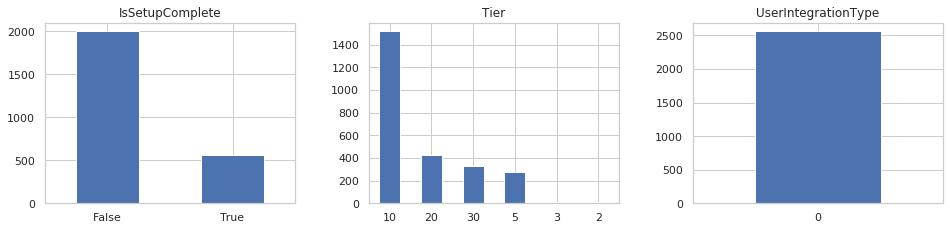

In [0]:
# categorical_features = ["IsSetupComplete", Tier", "UserIntegrationType"]

fig, ax = plt.subplots(1, 3, figsize=(14, 4))
for i, categorical_feature in enumerate(categorical_features):
  df[categorical_feature].value_counts().plot(kind='bar', ax=ax[i], rot=0).set_title(categorical_feature)

fig.tight_layout(pad=3.0)

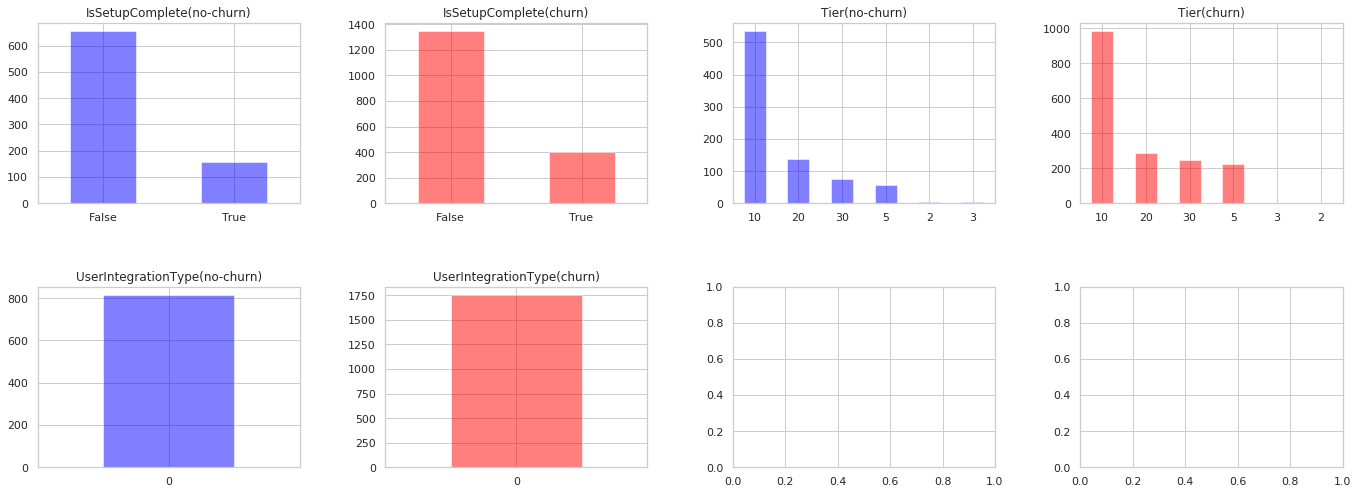

In [0]:
# 2 row 4 col
fig, ax = plt.subplots(2, 4, figsize=(20, 8))

df[df.Churn == False]['IsSetupComplete'].value_counts().plot(kind='bar', color="blue", alpha=0.5, ax=ax[0, 0], rot=0).set_title('IsSetupComplete(no-churn)')
df[df.Churn == True]['IsSetupComplete'].value_counts().plot(kind='bar', color="red", alpha=0.5, ax=ax[0, 1], rot=0).set_title('IsSetupComplete(churn)')

df[df.Churn == False]['Tier'].value_counts().plot(kind='bar', color="blue", alpha=0.5, ax=ax[0, 2], rot=0).set_title('Tier(no-churn)')
df[df.Churn == True]['Tier'].value_counts().plot(kind='bar', color="red", alpha=0.5, ax=ax[0, 3], rot=0).set_title('Tier(churn)')

df[df.Churn == False]['UserIntegrationType'].value_counts().plot(kind='bar', color="blue", alpha=0.5, ax=ax[1, 0], rot=0).set_title('UserIntegrationType(no-churn)')
df[df.Churn == True]['UserIntegrationType'].value_counts().plot(kind='bar', color="red", alpha=0.5, ax=ax[1, 1], rot=0).set_title('UserIntegrationType(churn)')

fig.tight_layout(pad=4.0)

Numerical feature distributions

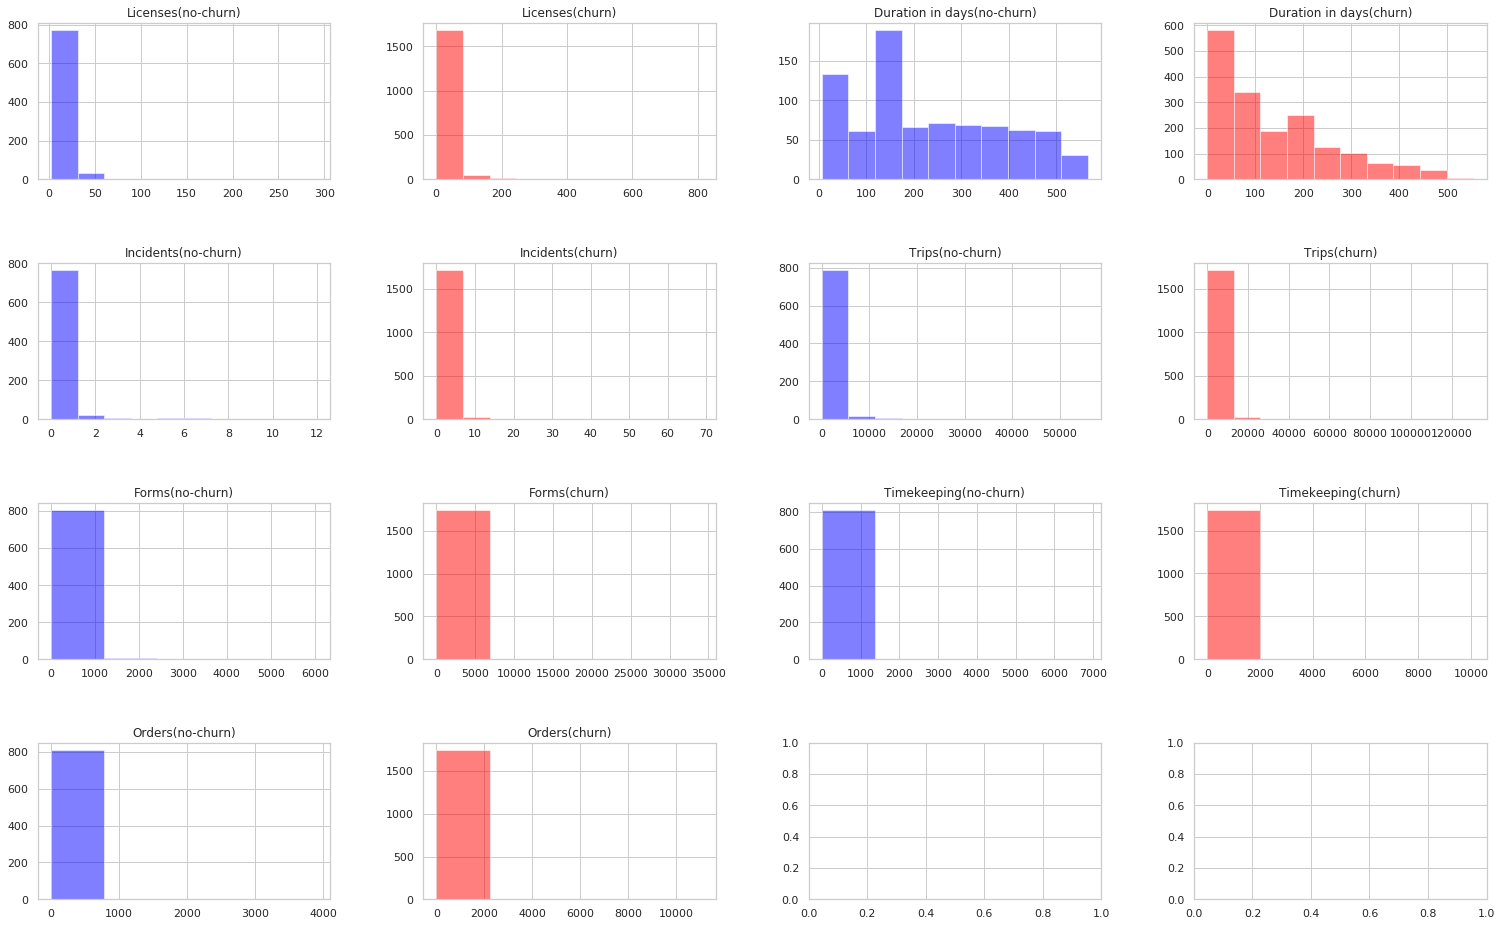

In [0]:
# numerical_features = ["Licenses", "Duration", "Incidents", "Trips", "Forms", "Timekeeping", "Orders"]

rows, columns = 4, 4
fig, ax = plt.subplots(rows, columns, figsize=(22, 14))

df[df.Churn == False]["Licenses"].hist(bins=10, color="blue", alpha=0.5, ax=ax[0, 0]).set_title("Licenses(no-churn)")
df[df.Churn == True]["Licenses"].hist(bins=10, color="red", alpha=0.5, ax=ax[0, 1]).set_title("Licenses(churn)")

df[df.Churn == False]["Duration"].hist(bins=10, color="blue", alpha=0.5, ax=ax[0, 2]).set_title("Duration in days(no-churn)")
df[df.Churn == True]["Duration"].hist(bins=10, color="red", alpha=0.5, ax=ax[0, 3]).set_title("Duration in days(churn)")

df[df.Churn == False]["Incidents"].hist(bins=10, color="blue", alpha=0.5, ax=ax[1, 0]).set_title("Incidents(no-churn)")
df[df.Churn == True]["Incidents"].hist(bins=10, color="red", alpha=0.5, ax=ax[1, 1]).set_title("Incidents(churn)")

df[df.Churn == False]["Trips"].hist(bins=10, color="blue", alpha=0.5, ax=ax[1, 2]).set_title("Trips(no-churn)")
df[df.Churn == True]["Trips"].hist(bins=10, color="red", alpha=0.5, ax=ax[1, 3]).set_title("Trips(churn)")

df[df.Churn == False]["Forms"].hist(bins=5, color="blue", alpha=0.5, ax=ax[2, 0]).set_title("Forms(no-churn)")
df[df.Churn == True]["Forms"].hist(bins=5, color="red", alpha=0.5, ax=ax[2, 1]).set_title("Forms(churn)")

df[df.Churn == False]["Timekeeping"].hist(bins=5, color="blue", alpha=0.5, ax=ax[2, 2]).set_title("Timekeeping(no-churn)")
df[df.Churn == True]["Timekeeping"].hist(bins=5, color="red", alpha=0.5, ax=ax[2, 3]).set_title("Timekeeping(churn)")

df[df.Churn == False]["Orders"].hist(bins=5, color="blue", alpha=0.5, ax=ax[3, 0]).set_title("Orders(no-churn)")
df[df.Churn == True]["Orders"].hist(bins=5, color="red", alpha=0.5, ax=ax[3, 1]).set_title("Orders(churn)")

fig.tight_layout(pad=4.0)

Correlation Matrix and Heatmap

In [0]:
df_corr = df[categorical_features + [target] + numerical_features]

df_corr.corr()

,IsSetupComplete,Tier,UserIntegrationType,Churn,Licenses,Duration,Incidents,Trips,Forms,Timekeeping,Orders
IsSetupComplete,1.000000,0.126052,NaN,0.039486,0.104265,0.083370,0.168732,0.313432,0.135752,0.183338,0.109926
Tier,0.126052,1.000000,NaN,0.042594,0.077641,-0.021855,0.023792,0.040098,0.107324,0.130413,0.096270
UserIntegrationType,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Churn,0.039486,0.042594,NaN,1.000000,0.126560,-0.302361,0.037725,0.019278,0.018985,0.002409,0.004434
Licenses,0.104265,0.077641,NaN,0.126560,1.000000,0.087952,0.187460,0.349444,0.407942,0.116717,0.098843
Duration,0.083370,-0.021855,NaN,-0.302361,0.087952,1.000000,0.083647,0.126078,0.053392,0.090844,0.040447
Incidents,0.168732,0.023792,NaN,0.037725,0.187460,0.083647,1.000000,0.173869,0.116761,0.036610,0.033537
Trips,0.313432,0.040098,NaN,0.019278,0.349444,0.126078,0.173869,1.000000,0.210205,0.324303,0.280723
Forms,0.135752,0.107324,NaN,0.018985,0.407942,0.053392,0.116761,0.210205,1.000000,0.216227,0.179101
Timekeeping,0.183338,0.130413,NaN,0.002409,0.116717,0.090844,0.036610,0.324303,0.216227,1.000000,0.374043


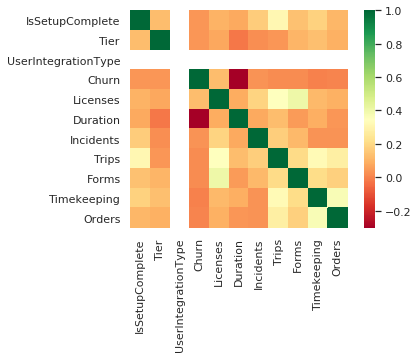

In [0]:
sns.heatmap(df_corr.corr(), square=True, cmap='RdYlGn')

Sampled dataframe

In [0]:
df_sampled = df.sample(replace=False, frac=1, random_state=42)

df_sampled.shape

Out[25]: (2560, 24)

**Training**

In [0]:
df_final = df_sampled[categorical_features + [target] + numerical_features]

X = df_final.loc[:, df_final.columns != 'Churn']
y = df_final.loc[:, df_final.columns == 'Churn']

In [0]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

clf = tree.DecisionTreeClassifier(random_state=42)
  
param_grid = {'max_depth': [4,5,6,7,8,None], 
              'min_samples_leaf': np.arange(1, 5), 
              'min_samples_split': np.arange(2, 5)
             }
  
tree_cv = GridSearchCV(estimator=clf, param_grid=param_grid, cv=6)
  
tree_cv.fit(X_train, y_train)
  
pred = tree_cv.predict(X_test)
  
print("Tuned Decision Tree: {}".format(tree_cv.best_params_))
print('Accuracy of DecisionTree classifier on test set: {:.2f}'.format(tree_cv.score(X_test, y_test)))
  
# Log mlflow attributes for mlflow UI
mlflow.log_param("hyperparameters", tree_cv.best_params_)
mlflow.sklearn.log_model(tree_cv, "model")
mlflow.log_metric("accuracy", tree_cv.score(X_test, y_test))

# save the model
# modelpath = "/dbfs/mlflow/churn/decision-tree/model"
# mlflow.sklearn.save_model(tree_cv, modelpath)
# PermissionError: [Errno 13] Permission denied: '/dbfs/mlflow'


Tuned Decision Tree: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy of DecisionTree classifier on test set: 0.74

**Testing **

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

precision recall f1-score support

 0 0.66 0.36 0.47 205
 1 0.75 0.91 0.82 435

 accuracy 0.74 640
 macro avg 0.71 0.64 0.65 640
weighted avg 0.72 0.74 0.71 640

Get model, class names & feature names

In [0]:
model = tree_cv.best_estimator_
class_names = [str(el) for el in model.classes_]
feature_names = categorical_features + numerical_features

print(feature_names)
print(class_names)

['IsSetupComplete', 'Tier', 'UserIntegrationType', 'Licenses', 'Duration', 'Incidents', 'Trips', 'Forms', 'Timekeeping', 'Orders']
['0', '1']

**Model Interpretation**

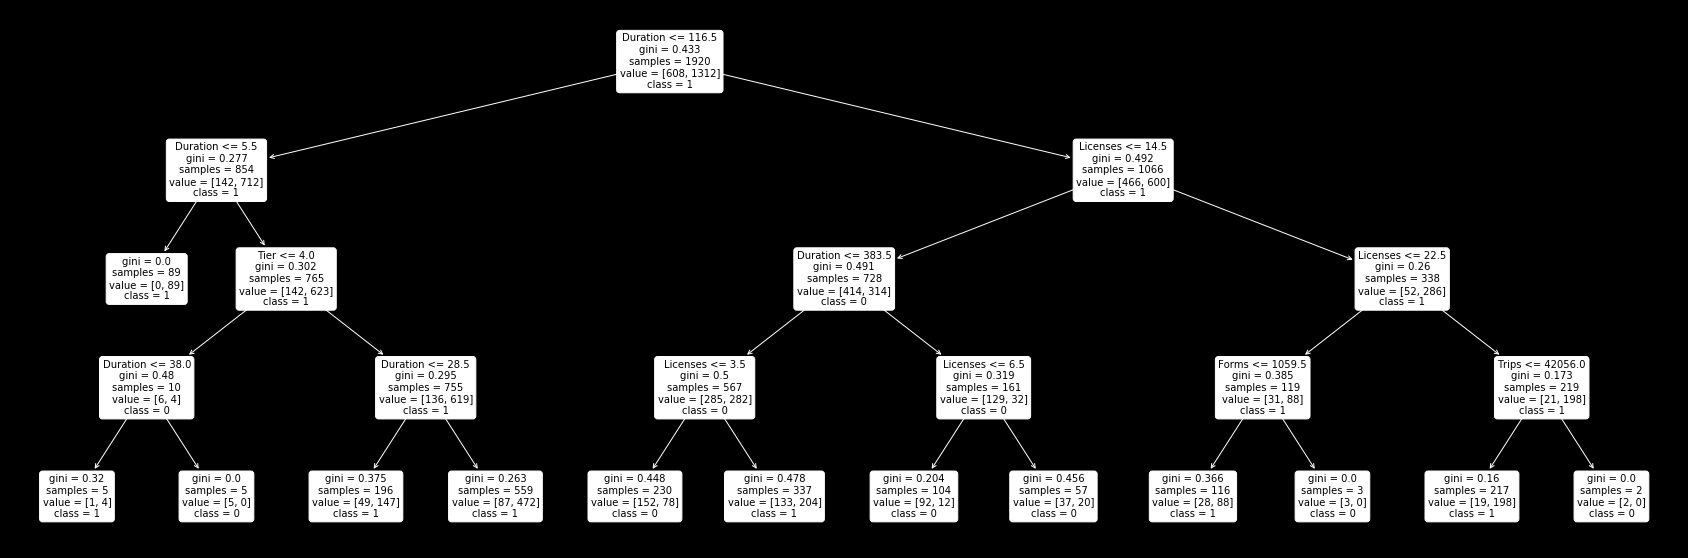

In [0]:
plt.style.use('dark_background')
mpl.rcParams['text.color'] = 'black'

fig, ax = plt.subplots(figsize=(30, 10))

tree.plot_tree(model,
               feature_names = feature_names, 
               class_names = class_names,
               fontsize = 10,
               proportion = False,
               rounded = True,
               max_depth = 6,
               ax = ax
              )
plt.show()


In [0]:
import shap

plt.style.use('ggplot')

shap_values = shap.TreeExplainer(model).shap_values(X_train)

Summy plot: impact on mdoel output for **Churn and No-Churn**

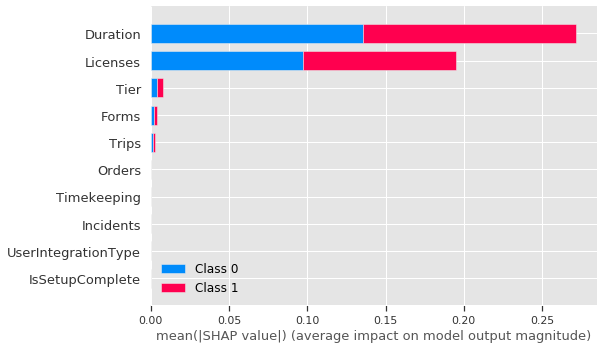

In [0]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

Summary plot for **No-Churn**

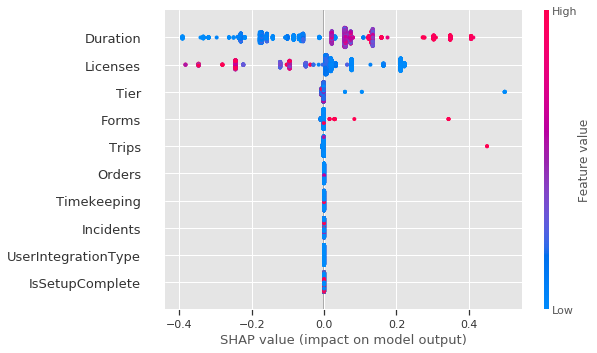

In [0]:
shap.summary_plot(shap_values[0], X_train)

Summary plot for **Churn**

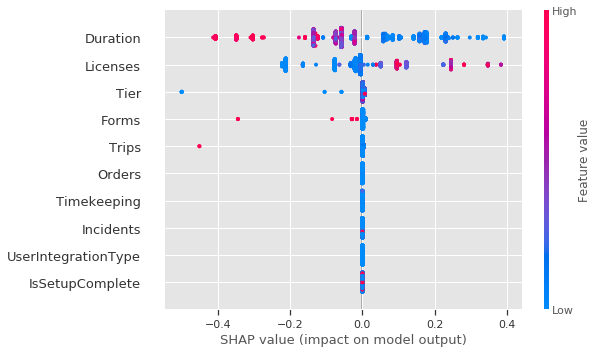

In [0]:
shap.summary_plot(shap_values[1], X_train)

Dependency plot for **Duration (No-Churn)**

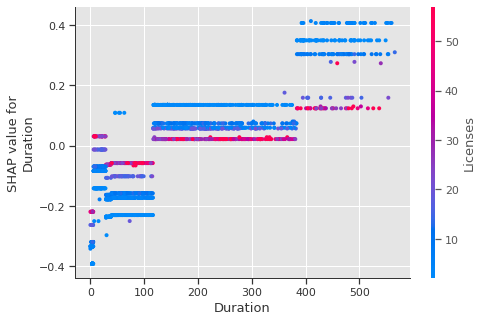

In [0]:
shap.dependence_plot('Duration', shap_values[0], X_train)

Dependency plot for **Duration (Churn)**

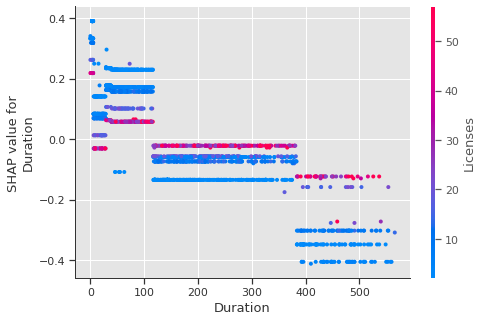

In [0]:
shap.dependence_plot('Duration', shap_values[1], X_train)

In [0]:
mlflow.end_run()